<span style="color:red"><b>This notebook has been re-run after writing and exporting the full text in order to refresh the table of content. This might have resulted in some discrepancies between the text and the results printed by the code for all machine learning models.</b></span>

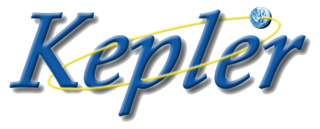

<p><p>

<center><span style="font-size:5em">Objects of Interest</span></center>

Author: Brita von Bartenwerffer<br>
January/February 2021

# Foreword

This analysis has been performed in conjunction with the course "Data-Driven Astronomy" offered by the University of Sydney. The aim was to solidify the concepts taught during the course as well as to get more of a feel for astronomical datasets.

The text as well as the code used in the analysis and machine learning is entirely my own as the course used different datasets and -formats. The course module on exoplanets was based on SQL while I'm using Python and its pandas library. The machine learning modules worked with data from the Sloan Digital Sky Survey, dealing with galaxies.

This paper makes no pretence of being a scientific work. However, to the best of my knowledge all astronomical facts and conclusions are accurate if slightly outdated since newer missions like the Transiting Exoplanet Survey Satellite (TESS) have come online.

This paper as well as the dataset used and the complete Jupyter notebook are available here:  
https://github.com/britavb/kepler_objects_of_interest.

I'm happy for anyone to browse the notebook and get inspiration for their own but **please DO NOT reuse my work as your own**. How would you feel if you were asked to peer-review someone's efforts and found yourself looking at your own work?! I did, once, and it wasn't fun.

Please be aware that the analysis part is plot-heavy to avoid presenting confusing tables with many rows and columns.

# Introduction

## Hunting for Exoplanets

The Sun is a star.

This may seem pretty obvious today but for thousands of years people had little idea what the bright pinpricks of lights in the night sky were. Even today with much more sophisticated technology available the biggest stars still appear as little more than fuzzy discs in visible light so it wasn't easy to figure out that they actually *are* like the Sun. It wasn't until the 17th century that scientists began to consider seriously that the sun and stars might be alike, with the latter being incredibly far away.

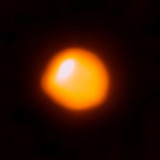
<center><span style="font-size:0.8em">Red Supergiant Betelgeuse<br>Credits: ALMA (ESO/NAOJ/NRAO)/E. Gorman/P. Kervella</span></center>

One of the hot topics in astronomy today is the question "Are We Alone?". Is there intelligent life out there in the universe? Can there even *be* life as we know it elsewhere?

When the first science fiction novels came out, planets around other stars were only a theoretical concept. None had ever been observed. After all, if telescopes can barely make out details of the stars how could they detect a planet around it?

In 1992 the first two exoplanets were discovered, orbiting a pulsar of all things. A pulsar is a dead stellar remnant left behind by a supernova of a star not massive enough to form a black hole. Any planets of that system should have been destroyed by the enormous forces during the supernova event. Scientists found it hard to believe that a pulsar could have planets at all. However, the observations were confirmed and later a third planet was detected. Today it's believed that the planets actually formed after the event from the cloud of dust left over by the explosion.

It took another three and a half years for a planet to be discovered and confirmed in orbit around a Sun-like star. The star in question, 51 Pegasi, has a mass of 1.11 times the mass of the Sun and is older and slightly bigger.

By January 22, 2021 the number of planets around other stars has risen to a staggering 4331 but only a handful were observed directly. This is hardly surprising. The biggest planet in our solar system is Jupyter with a diameter of 139,820 km but this is dwarfed by the Sun's diameter of 1,392,700 km. Stars are also billions of times more luminous that any planet. It would be fiendishly hard to spot even a huge, above Jupyter sized planet in another planetary system against the glare of its host star.

Over the years many methods have been used to find exoplanets, with more or less success. The two main successful methods are:

### Detection Method: Radial velocity

We think of Earth and all other planets of the solar system as orbiting the Sun. However, in physics things are more complicated. While the Sun's gravity keeps Earth in its orbit, Earth's gravity effects the Sun as well. This is known as the two-body problem where two bodies orbit round their combined centre of mass, the barycentre. If there were no other planets in the solar system, the Earth-Sun's barycentre would lie around 30,000 km from the centre of the Sun, well inside the Sun. Both the Sun and Earth would orbit around this barycentre, making the Sun wobble slightly. Having eight more planets in the system makes this a lot more complicated. In general, every body in the solar system orbits around the centre of their combined mass. This is true for moons as well. While they don't orbit around the Sun they and their planets orbit around their barycentre as well. In this case the planet's gravitational attraction is much higher than the Sun's.

The same orbital mechanics work for other planetary systems. They, too, orbit around their combined centre of mass. This effect cannot be observed directly with telescopes because the shift is too small to see over the distances involved. As technology evolved it became possible to observe the minute shift in the star's light as it moved towards and away from us using spectrometers. While the light emitted by the star does not change the light waves will be stretched ("red-shifted") or compressed ("blue-shifted") through the motion.

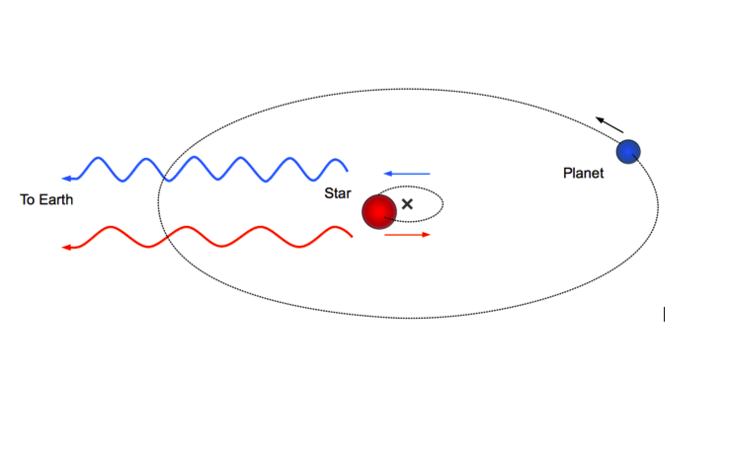
<center><span style="font-size:0.8em">Credits: The Pennsylvania State University</span></center>

This method only works if we see the planetary system edge-on, otherwise the star will not be moving away or towards us but up and down or left and right and there are no changes in the light's spectrum. In the early days of hunting for exoplanets it was the only way to detect them. The star's "wobble" is bigger if the exoplanet is large because it exerts more of a force onto its star. This explains why almost all exoplanets found in early days were Jupiter-sized and above.

Radial velocity can be used to determine the planet's mass but not its size. A planet could be dense and rocky like Earth or less dense and gaseous like Jupiter and Saturn and still have the same mass but be very different in size.

### Detection Method: Transit photometry

When a planet passes directly in front of its star this is called a transit. Transits can be observed in our own solar system from Earth when either Mercury or Venus pass in front of the Sun. When they do so the Sun's light is dimmed by a very tiny amount, e.g. 0.001% for Venus. And if an alien was observing our solar system the Sun's light would only be dimmed by around 1% by Jupiter.

Although this amount is tiny it can be measured accurately when the planetary system is seen more or less edge-on (otherwise there is no transit). It can be inclined somewhat to the plane of the Solar System but the planet still has to be able to pass in front of the star. The best measurements are obtained when the planets pass along the equator of the star though. By measuring every half hour or less a light curve of the transit can be constructed.

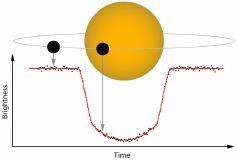
<center><span style="font-size:0.8em">Credits: Unknown</span></center>

The size of the orbiting body can be calculated from the vertex of the light curve. On the other hand, the mass cannot be calculated because the amount of light dimmed has no relation to either the mass or the density of the planet.

By repeated observations over a long time frame it is also possible to determine the size of its orbit from the amount of time that passes between two transits which again gives us the distance from the star. The same goes for the radial velocity method of course.

The transit method is much more successful than the radial velocity method and had overtaken the number of exoplanets detected by 2012 because it is by far the easier method to employ. This is where the Kepler mission comes in which used photometry to find exoplanets.

## The Kepler Mission

Kepler was launched in early Spring of 2009 and started observations in May of the same year. It was planned to be in service for three and a half years. The mission was extended several times until the spacecraft finally ran out of fuel at the end of October 2018 after nine and a half years. The observatory was decommissioned two weeks later but the data it provided is still analysed today, including follow-up observations for exoplanet candidates.

Kepler was stationed in a heliocentric orbit (i.e. orbiting the Sun), trailing Earth in its orbit at about 151 million km distance.

Initially Kepler's field of view was fixed to a portion of the constellation Cygnus which had been decided on prior to launch. This constellation is easily visible from Earth's Northern Hemisphere during summer and autumn and a favourite of (amateur) astronomers because there are *a lot* of stars there. It also hosts the first black hole ever discovered: Cygnus X1. If you are a stargazer, the field of view is located between the bright stars Vega to the East and Deneb to the West.

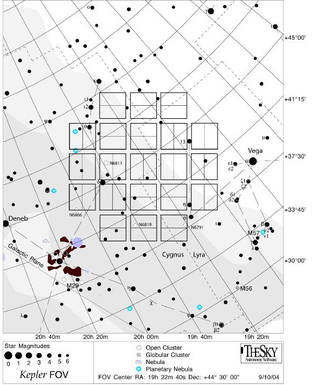
<center><span style="font-size:0.8em">Note: Celestial North beyond the top left corner<br>Credits: NASA Ames Research Center</span></center>

Kepler was a low-cost mission that was build mostly from off-the-shelf rather than bespoke components. Whether this is the reason why one of the reactions wheels needed to keep the space observatory stable broke after three years remains unclear. There was a spare that could be used so the mission was not jeopardized. It was actually extended beyond the mission's planned duration of three and a half years in order to gain more observation time. Unfortunately only half a year later a second reaction wheel broke. This time there was no spare and it could not be repaired remotely. The mission came to an end in May 2013 almost exactly four years after first light. Later that year a secondary mission called K2 was approved and Kepler continued to collect loads of data on exoplanets but its field of view was no longer fixed to the Cygnus constellation.

During its total lifetime of nine and a half years Kepler observed over 530,000 stars and had detected 2,662 confirmed exoplanets by the end of its secondary mission. The number of confirmed planets is subject to change due to follow-up observations made.

## The Dataset

When the primary mission ended after four years a catalogue containing 9564 objects was compiled. These objects were now know as "Kepler Objects of Interest (KOIs)". All of them had been identified as exoplanet candidates from the many, many images taken by the space observatory during its mission by scientists analysing them.

In August 2018 something like half of the objects had been weeded out as False Positives by follow-up observations or cross-referencing with other datasets, leaving the other half either as candidates or confirmed exoplanets. Since then there don't seem to have been any updates to the catalogue.

The cumulative dataset can be viewed and downloaded for further analysis from the NASA Exoplanet Archive:<br>
https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative<br>
and is the data basis this analysis works with.

"The cumulative KOI table gathers information from the individual KOI activity tables that describe the current results of different searches of the Kepler light curves. The intent of the cumulative table is to provide the most accurate dispositions and stellar and planetary information for all KOIs in one place. All the information in this table has provenance in other KOI activity tables." (https://exoplanetarchive.ipac.caltech.edu/docs/PurposeOfKOITable.html#cumulative)

# Data Analysis

## Stars of Interest

### Masses and Sizes

The catalogue contains 8214 stars around which one or more exoplanet candidates or Kepler Objects of Interest (KOIs) were found. Their masses range from 0.1 to 3.7 times the Sun's mass (M<sub>☉</sub>) with mean and median values being near the mass of our Sun. Deneb, the brightest star in the constellation Cygnus although not in Kepler's field of view, has a mass of approx. 19 M<sub>☉</sub>. It is a blue supergiant so it seems likely that higher mass stars either don't have planets in the first place or have ejected or consumed them when they left the main sequence and became giant stars.

Our Sun will begin to swell up, cool and become a red giant in about 5 billion years. So far the jury is out on how Earth will be affected but there's little doubt that both Mercury and Venus will be consumed by the swelling Sun. Earth might also find itself consumed or its orbit might slowly drifts outward. The Sun will not explode as a supernova because it doesn't have enough mass. Once it has ejected its outer layers if will contract again and become a white dwarf, a small, hot, dense stellar remnant that will slowly cool over billions of years.

The sizes of the stars in the catalogue are much more diverse, ranging from 0.1 solar radii (R<sub>☉</sub>) to just over 229. Here, Deneb has a radius of 209 R<sub>☉</sub> and we already know it's a supergiant which likely has no planets of its own. Let's have look at all stars with R<sub>☉</sub> above 100 and see if they are giants in their own right and can be neglected for this analysis.

In [1]:
# import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# define solar-system constants
sol_sys_names = np.array(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 
                          'Saturn', 'Uranus', 'Neptune'])
# planet radius in Earth radii
sol_sys_rad = np.array([0.383, 0.949, 1, 0.532, 11.209, 9.45, 4.01, 3.883])
# semi-major axis in AU
sol_sys_sma = np.array([0.387, 0.723, 1, 1.52, 5.20, 9.58, 19.20, 30.05])
# orbital epriod in days
sol_sys_orbit = np.array([88.0, 224.7, 365.2, 687.0, 4331, 10747, 30589, 59800])
sol_sys_mass = np.array([])
sol_sys_smass = [1 for i in range(len(sol_sys_rad))]

# ensure it's printable on a laser printer
plt.style.use('bmh')

# import dataset to dataframe
#ep = pd.read_csv('Kepler Objects of Interest.csv',
ep = pd.read_csv('cumulative_allrows_allcolumns.csv',
                  header=86)

star_params = ep[['kepid', 'koi_disposition',
                  'koi_steff', 'koi_smass', 'koi_srad', 'ra', 'dec', 'koi_kepmag']].drop_duplicates()
star_params.rename(columns={'koi_srad':'Radius (Rsol)', 'koi_smass':'Mass (Msol)',
                            'koi_disposition':'Exoplanet Status', 'koi_steff':'Temp (Kelvin)',
                            'koi_kepmag':'Magnitude'}
                   , inplace=True)
star_temp = star_params[star_params['Radius (Rsol)'] > 100][['Radius (Rsol)', 'Mass (Msol)', 
                                                 'Temp (Kelvin)', 'Exoplanet Status']].\
                                                 sort_values('Radius (Rsol)',
                                                 ascending=False)
display(star_temp.style.hide_index())

Radius (Rsol),Mass (Msol),Temp (Kelvin),Exoplanet Status
229.908000,3.426000,3681.000000,FALSE POSITIVE
180.013000,3.735000,3486.000000,FALSE POSITIVE
162.725000,1.075000,3198.000000,FALSE POSITIVE
152.969000,1.110000,3287.000000,CANDIDATE
151.184000,1.436000,3297.000000,CANDIDATE
150.091000,3.686000,3711.000000,FALSE POSITIVE
138.056000,1.291000,3420.000000,FALSE POSITIVE
116.965000,0.935000,3306.000000,FALSE POSITIVE
101.451000,1.679000,3598.000000,FALSE POSITIVE


Without exception all temperatures are below 4000 K which denotes a cool star. For comparison, the Sun has a photospheric temperature of 5772 K. Looking at the Hertzsprung-Russell-Diagram below tells us that these stars are either much smaller than the Sun, which is obviously not the case here, or have entered their red giant-phase and are less likely to (still) have exoplanets. As the table above shows there are no confirmed exoplanets for either of them.

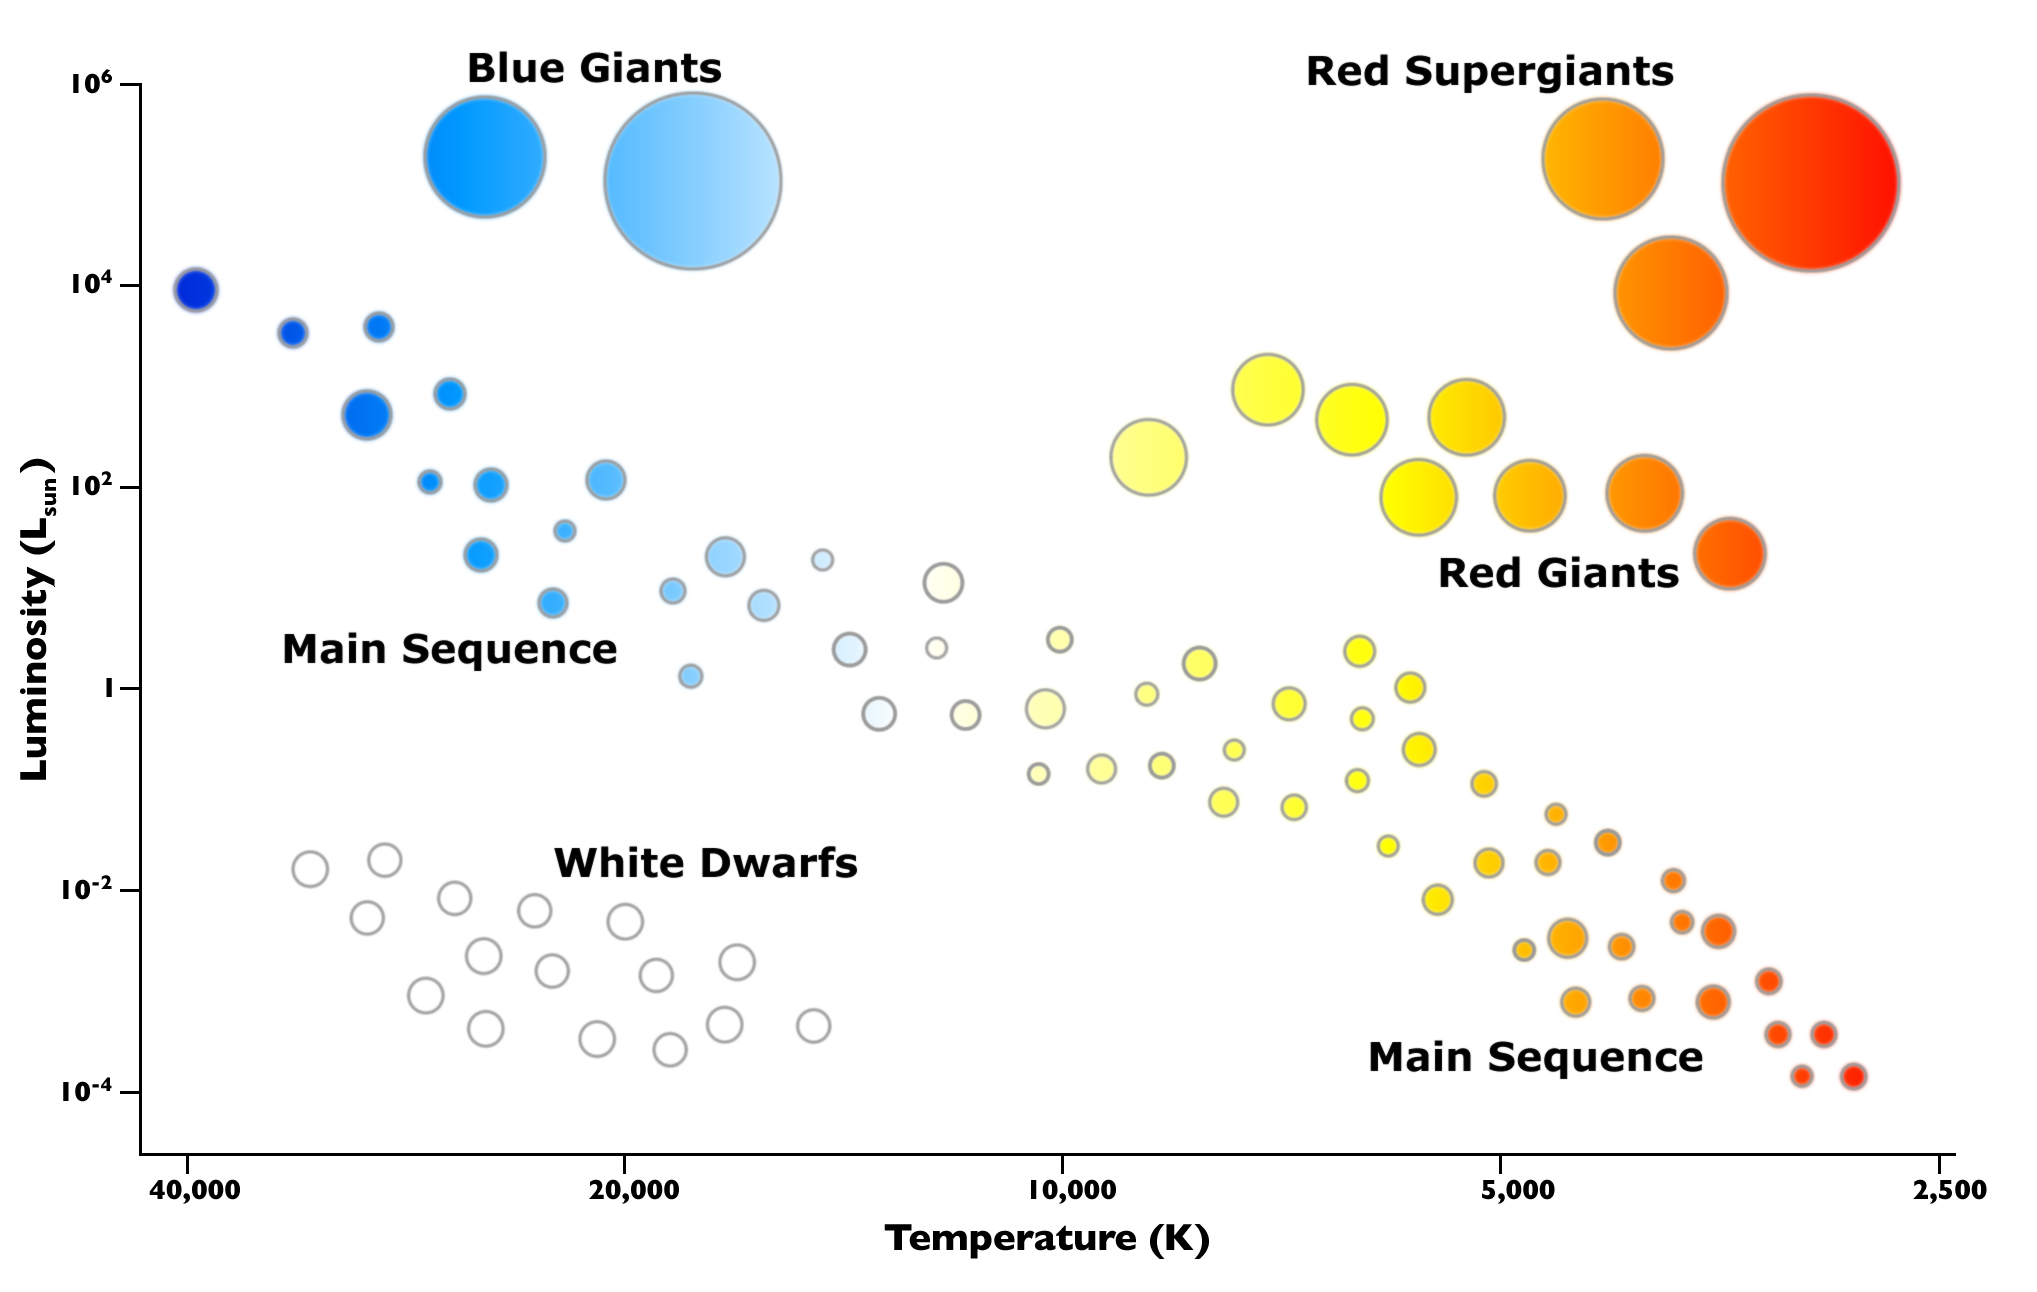
<center><span style="font-size:0.8em">Credits: Las Cumbres Observatory</span></center>

Another possibility is that these stars are still in their infant phases as they, too, are still bloated until each contracts, starts hydrogen fusion in its core and becomes a star on the main sequence. However, this is unlikely to be the explanation here as they can generally only be observed in the infrared because they are still surrounded by the discs of material they collapsed from. Kepler was solely observing in the visible spectrum. On top of that Kepler's field of view was chosen because it did not have many star-forming regions in it.

It should also be noted that observation of planets around giants is more difficult because the planets' orbits are by nature bigger and so might not have been observed once during the four-year window Kepler was actively staring at them.

For plotting purposes all stars with a radius above 10 M<sub>☉</sub> will be ignored when the radius is shown in the plot. Out of these 124 stars 106 had their exoplanets classified as false positives, only one is listed as confirmed and the rest are candidates.

### Masses, Sizes and Magnitudes Plotted

Here we can see the distribution of masses and radii of the stars in the catalogue. The vast majority of them are comparable to our Sun, with masses slightly below and radii slightly above Sun's values.

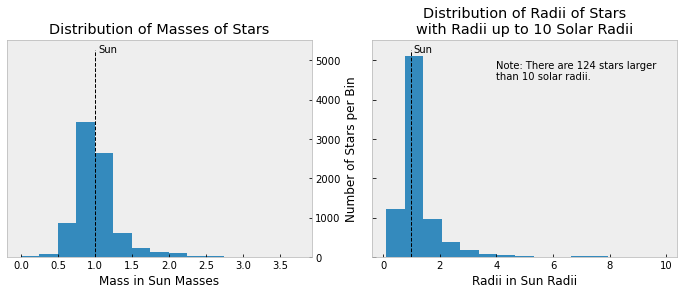

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=True)
# solar masses
star_params['Mass (Msol)'].hist(ax=ax1, bins=15)
ax1.vlines(1, 0, 5250, lw=1, ls='dashed')
ax1.text(1.05, 5200, 'Sun')
ax1.grid()
ax1.set_xlabel('Mass in Sun Masses')
ax1.yaxis.set_label_position('right')
ax1.yaxis.tick_right()
ax1.set_ylabel('Number of Stars per Bin')
ax1.set_title('Distribution of Masses of Stars')
# solar radii
star_params[star_params['Radius (Rsol)'] <= 10]['Radius (Rsol)'].hist(ax=ax2, bins=15)
ax2.set_xlabel('Radii in Sun Radii')
ax2.set_title('Distribution of Radii of Stars\nwith Radii up to 10 Solar Radii');
ax2.vlines(1, 0, 5250, lw=1, ls='dashed')
ax2.text(1.05, 5200, 'Sun')
ax2.text(4, 4500, 'Note: There are ' + str(len(star_params[star_params['Radius (Rsol)'] > 10])) +
         ' stars larger\nthan 10 solar radii.')
ax2.grid()
# fig.suptitle('Distribution of ' + str(star_params['kepid'].nunique()) +
#              ' Unique Stars by Mass and Radius', y=1.05, weight='bold');

Another characteristic of stars is their visual or apparent magnitude. It measures how bright the star appears to the observer. If the distance to the star is known the absolute magnitude of the star can be calculated. This dataset does not include distances but the plots can tell us a bit about this.

Magnitudes are measured in reverse order: the lower the number the brighter the object. Magnitudes with negative values are also possible: These are very bright indeed! The full Moon has an apparent magnitude of -12.4. The highest magnitude visible with the naked eye is 6. Any values higher (=fainter) than this require at least binoculars to see.

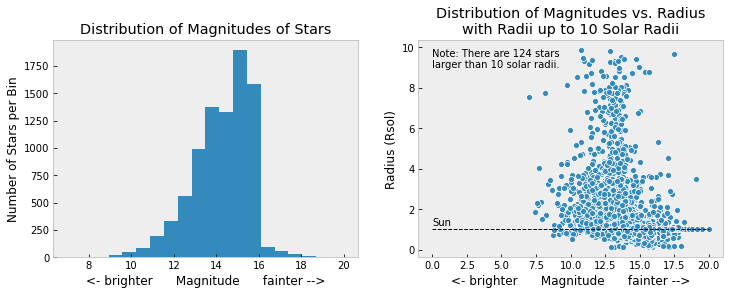

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
# solar masses
star_params['Magnitude'].hist(ax=ax1, bins=20)
ax1.set_xlabel('<- brighter      Magnitude      fainter -->')
ax1.grid()
ax1.set_ylabel('Number of Stars per Bin')
ax1.set_title('Distribution of Magnitudes of Stars')
# solar radii
sns.scatterplot(x='Magnitude', y='Radius (Rsol)', 
                data=star_params[star_params['Radius (Rsol)'] < 10],
                ax=ax2)
ax2.set_xlabel('<- brighter      Magnitude      fainter -->')
ax2.set_title('Distribution of Magnitudes vs. Radius\nwith Radii up to 10 Solar Radii');
ax2.hlines(1, 0, 20, lw=1, ls='dashed')
ax2.text(0, 1.2, 'Sun')
ax2.text(0, 9, 'Note: There are ' + str(len(star_params[star_params['Radius (Rsol)'] > 10])) +
         ' stars\nlarger than 10 solar radii.')
ax2.grid();

These plots show the magnitudes measured during the mission by the Kepler space telescope rather than those in the Kepler Input Catalogue. The distribution is screwed to the left with a mean and median around 14.4. None of the stars is visible with the naked eye and only very few might be visible with binoculars. 

Plotting the magnitudes against the radii of the stars shows a wide spread up to four times the size of the Sun. This gives us an idea of distances: Stars with the same size on the left of the bulge are nearer to Earth while those on the right side are farthest away. It is more difficult to detect exoplanets around smaller stars that are also farther away but in our case there is no bias introduced as both confirmed exoplanets and candidates seem fair evenly distributed for Sun-like stars:

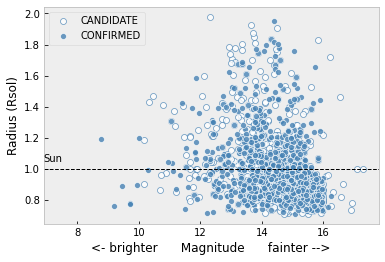

In [4]:
fig, ax = plt.subplots()
# sns.scatterplot(x='Magnitude', y='Radius (Rsol)', hue='Exoplanet Status', style='Exoplanet Status',
#                 data=star_params[(star_params['Exoplanet Status'] != 'FALSE POSITIVE') & \
#                 (star_params['Radius (Rsol)'] < 2)],
#                 markers=['o', 'v'], alpha=0.8, ax=ax)
sns.scatterplot(x='Magnitude', y='Radius (Rsol)',
                data=star_params[(star_params['Exoplanet Status'] == 'CANDIDATE') & \
                (star_params['Mass (Msol)'] >= 0.8) & (star_params['Mass (Msol)'] <= 1.04) & \
                (star_params['Radius (Rsol)'] < 2)],
                markers=['v'], fc='white', ec='steelblue', alpha=0.8, ax=ax, label='CANDIDATE')
sns.scatterplot(x='Magnitude', y='Radius (Rsol)', 
                data=star_params[(star_params['Exoplanet Status'] == 'CONFIRMED') & \
                (star_params['Mass (Msol)'] >= 0.8) & (star_params['Mass (Msol)'] <= 1.04) & \
                (star_params['Radius (Rsol)'] < 2)],
                markers=['o'], color='steelblue', alpha=0.8, ax=ax, label='CONFIRMED')
ax.set_xlabel('<- brighter      Magnitude      fainter -->')
ax.set_xlim(6.9, 17.8)
#ax.set_title('Distribution of Magnitudes vs. Radius\nwith Radii up to 10 Solar Radii');
ax.hlines(1, 6.9, 17.8, lw=1, ls='dashed')
ax.text(6.9, 1.05, 'Sun')
ax.grid();

However, there seems to be some sort of bias in the data because there is a clear cut at 16 magnitudes but it's hard to say whether this is by accident or by design. We can ignore this for further analysis though as the visual magnitude does not provide any additional value. A Sun-like star four light-years away can have just as many planets as the Sun does. It's just much fainter to our eyes. If there were alien eyes around there they'd see us just as faint!

### Distribution in Field of View

All the stars are fairly evenly distributed across Kepler's field of view. The same goes for stars with confirmed exoplanets. This supports the conclusion that exoplanets are a common phenomenon throughout at least our galaxy if not the whole observable universe. There certainly doesn't seem to be any obvious reason why planets should only be able to form in certain parts of the galaxy but it was the Kepler mission that actually confirmed this view.

Text(0.5, 1.0, 'Stars with Confirmed Exoplanets')

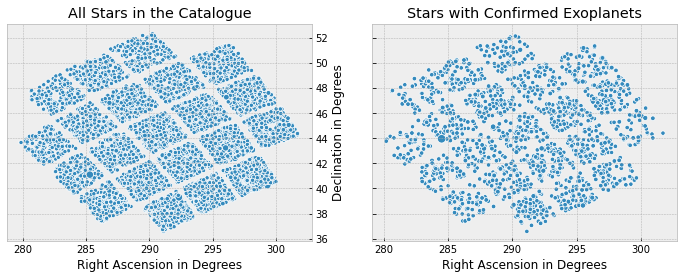

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=True)
sns.scatterplot(x='ra', y='dec', size='Radius (Rsol)',
                data=star_params, ax=ax1, legend=False)
ax1.set_xlabel('Right Ascension in Degrees')
ax1.yaxis.set_label_position('right')
ax1.yaxis.tick_right()
ax1.set_ylabel('Declination in Degrees')
ax1.set_title('All Stars in the Catalogue')
sns.scatterplot(x='ra', y='dec', size='Radius (Rsol)', legend=False,
                data=star_params[star_params['Exoplanet Status'] == 'CONFIRMED'], ax=ax2)
ax2.set_xlabel('Right Ascension in Degrees')
ax2.set_title('Stars with Confirmed Exoplanets')
#fig.suptitle('Distribution of Stars in the Field of View', y=1.05, weight='bold');

## Stars and Their Exoplanets

The dataset was last vetted in August 2018 and it's not quite clear whether scientist are still working with it and we may expect updates at some date in the near future.

### Count of Exoplanets per Star

Most stars in the survey have only one confirmed exoplanet. The number of planets per star does not change if all candidates are also included which, of course, may or may not turn out to be false positives.

As shown in the plot there are still a lot of exoplanet candidates so it's hard to infer any facts from this. Another problem is that the Kepler mission only went on for four years so there are some limitations:

1. There wasn't enough time to observe most exoplanets with an orbital period longer than four years as these will not have crossed in front of their parent stars at all.
2. A single planet that passed twice in front in its star may in fact have been two different planets with very similar light curves, e.g. a smaller one near the star and a bigger one further out. This is especially true for the candidates.
3. Small planets that orbit further out are very hard to spot so may have been missed when analysing the light curves taken by Kepler.

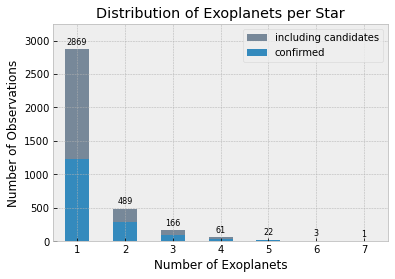

In [6]:
kepid_count_co = ep[ep['koi_disposition'] == 'CONFIRMED']['kepid'].value_counts().to_frame()
kepid_count_cc = ep[ep['koi_disposition'] != 'FALSE POSITIVE']['kepid'].value_counts().to_frame()
kepid_dist_cc = kepid_count_cc['kepid'].value_counts()
fig, ax = plt.subplots()
kepid_dist_cc.sort_index().plot(kind='bar', color='lightslategray', 
                                label='including candidates', ax=ax)
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.25, yval + 75, yval, fontsize=8, ha='center')
kepid_dist_co = kepid_count_co['kepid'].value_counts()
kepid_dist_co.sort_index().plot(kind='bar', label='confirmed')
plt.legend()
plt.ylim(0, 3250)
plt.xticks(rotation=0)
plt.xlabel('Number of Exoplanets')
plt.ylabel('Number of Observations')
plt.title('Distribution of Exoplanets per Star');

More observations will be needed to come to any conclusions how many planets per star are typical.

### Distances from the Star

Another interesting property to look at is the semi-major axis of the planet's orbit. The semi-major axis is the distance between the centre and the widest point of an ellipse. In case of a circular orbit around a star it is the actual distance between the star and the planet. In this dataset the eccentricity of the planet's orbit is zero for 9201 of them; the small rest are unknown. So we can take it that the semi-major axis given in the dataset represents the star-planet distance.

In this dataset the semi-major axis is given in astronomical units (AU) with 1 AU being the equivalent of the mean distance between the Sun and Earth: 149.6 million km. In this dataset the highest value is 44.98 AU which is about 10% further from the star than Pluto is from the Sun (or 50% further from the Sun than Neptune is if you want to stick to regular planets). This is an outlier in the dataset as can be seen when querying for planets with a semi-major axis larger than 2.5 AU. 

In [7]:
sem_ax = ep[ep['koi_sma'] > 2.5][['koi_period', 'koi_sma', 
                         'koi_prad', 'koi_disposition',
                         'koi_srad', 'koi_smass']].sort_values('koi_sma')
sem_ax['koi_period_years'] = sem_ax['koi_period'] / 365
display(sem_ax)

,koi_period,koi_sma,koi_prad,koi_disposition,koi_srad,koi_smass,koi_period_years
635,1500.140677,2.6340,18.35,CANDIDATE,2.283,1.083,4.109974
976,1693.663622,2.8364,10.23,CANDIDATE,1.021,1.059,4.640174
3399,2190.701035,2.9456,3.12,CANDIDATE,0.736,0.709,6.001921
342,129995.778400,44.9892,2.99,CANDIDATE,0.726,0.717,356.152818


This exoplanet candidate is the only outlier in the dataset with such a large semi-major axis. By itself it isn't particularly remarkable. Having a radius of just under three times Earth's radius it lies firmly inside the bulk of observed and confirmed exoplanets. It orbits around K01174.01 but is the only planet observed to do so. With both radius and mass being 0.7 times the Sun's values the planet is probably comparable to our ice giants, Uranus and Neptune - or a small star in orbit around a bigger one. The distances involved certainly support the possibility of it being a small stellar object; it is questionable whether a smallish star's gravity is sufficient to keep a smallish ice giant in orbit this far out. For now though I will simply ignore this one planet in order to keep the plots reasonably readable.

Plotting orbital period against the semi-major axis doesn't show any more extreme outliers when filtering out this one planet.

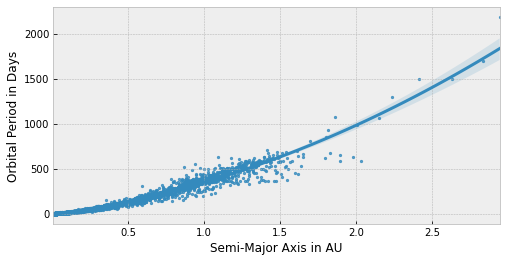

In [8]:
fig, ax1 = plt.subplots(figsize=(8, 4))
exo_sma = ep[ep['koi_sma'] < 44]
sns.regplot(x='koi_sma', y='koi_period', data=exo_sma, ax=ax1,
            scatter_kws={'s':5}, order=2)
ax1.set_xlabel('Semi-Major Axis in AU')
ax1.set_ylabel('Orbital Period in Days');

It has produced a very busy plot though! It does seem clear enough that exoplanets in general follow the same rules as  planets in our solar system do: The farther from the Sun, the longer it takes to orbit the Sun. After all, the same laws of physics apply everywhere in the universe, not just in our solar system.

It's interesting that in this case binominal regression fits the data better than simple linear regression does as is visible by the upward curving line. We don't have enough data to go any further than this since Kepler's primary mission ended after four years or under 1500 days. It will have seen very few planets with orbital periods above that. They might not even have crossed in front of their parent stars once during these four years. Remember that Jupiter takes 12 years to orbit the Sun!

Looking at planets' orbits we are mainly interested how these are distributed for planets around Sun-like stars in order to make some inference about habitability. G stars like the Sun typically have a mass of 0.8 to 1.04 times the Sun's mass. Here our outlier planet gets filtered out because it's orbiting a K class star (0.45 - 0.8 M<sub>☉</sub>).

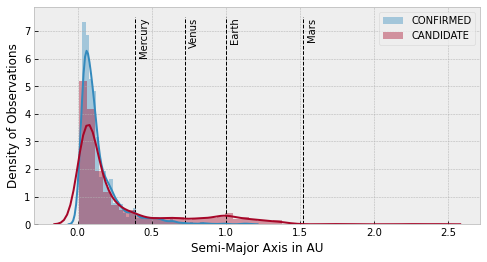

In [9]:
exo_sma_e = ep[(ep['koi_smass'] >= 0.8) & (ep['koi_smass'] <= 1.04)]
fig, ax1 = plt.subplots(figsize=(8, 4))
sns.distplot(exo_sma_e[exo_sma_e['koi_disposition'] == 'CONFIRMED']['koi_sma'], 
             label='CONFIRMED')
sns.distplot(exo_sma_e[exo_sma_e['koi_disposition'] == 'CANDIDATE']['koi_sma'], 
             label='CANDIDATE')
for x, name in zip(sol_sys_sma[:4], sol_sys_names[0:4]):
    plt.vlines(x, 0, 7.5, ls='dashed', lw=1)
    plt.text(x + 0.025, 7.5, name, rotation=90, va='top')
plt.legend()
plt.xlabel('Semi-Major Axis in AU')
plt.ylabel('Density of Observations');

As the plot shows the vast majority of planets around Sun-line stars have orbits that lie even closer in than Mercury's orbit. From this it can be inferred that the vast majority of them is not habitable since their surface temperatures will be very high. Many of them will be tidally looked or very nearly so. It might be that a couple of them do have atmospheres that help distribute the heat between day and night side but this close to the star it seems unlikely. The stellar wind will have stripped away all but the most dense atmosphere long ago.

As far as exoplanet candidates are concerned there's also a small but marked peak around an Earth-like orbit. This might be a bias introduced by the mission's goal which was to look for Earth-like planets around Earth-like stars.

## Exoplanets or KOIs

The dataset contains 9546 Kepler Objects of Interest out of which 2358 are confirmed exoplanets. Candidates still have to be vetted by follow-up observations while false positives can be grouped into four main categories as defined by NASA:

- `_nt`: A KOI whose light curve is not consistent with that of a transiting planet. This includes, but is not limited to, instrumental artifacts, non-eclipsing variable stars, and spurious (very low SNR) detections.
- `_ss`: A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary. However, self-luminous, hot Jupiters with a visible secondary eclipse will also have this flag set.
- `_co`: The source of the signal is from a nearby star.
- `_ec`: The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk.

The first two also turn up in around one fifth of rows for confirmed exoplanets but there is no indication given whether these are simply left-overs from early vetting statistics before follow-up observations.

### Placing Planets in Categories

There are many different scales for planet sizes to be found on the internet, issued by various organisation. NASA is using the following five categories for exoplanets on their Exoplanet Exploration website, depending on their radius. 

|Category|in Earth's radii|
|:----------|:-------------|
|Earth-sized|< 1.25 times|
|Super-Earth|1.25 to < 2 times|
|Neptune-sized|2 to <6 times|
|Jupiter-sized|6 to < 15 times|
|Larger|15 times and above|

This will also be used for the analysis although the results per category are broader than in more detailed scales you might find on the internet. The radius by itself doesn't give any indication of the composition of the planets. Without knowing the masses of them there's no way to distinguish between Super-Earths and mini-Neptunes we often read about in the press.

The most surprising result of the Kepler mission was that there are a lot less Jupiter-size planets or larger than expected:

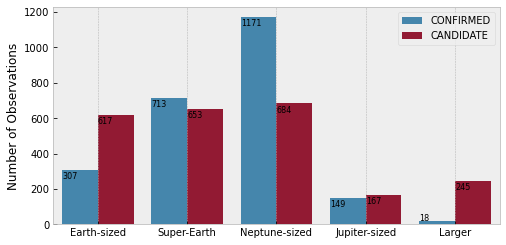

In [10]:
def size_to_cat(row):
    if row['koi_prad'] < 1.25:
        val = 'Earth-sized'
    elif row['koi_prad'] < 2:
        val = 'Super-Earth'
    elif row['koi_prad'] < 6:
        val = 'Neptune-sized'
    elif row['koi_prad'] < 15:
        val = 'Jupiter-sized'
    else:
        val = 'Larger'
    return val

ep['planet_cat'] = ep.apply(size_to_cat, axis=1)
ep.groupby(['planet_cat', 'koi_disposition'])['rowid'].count()

fix, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='planet_cat', hue='koi_disposition', 
              data=ep[ep['koi_disposition'] != 'FALSE POSITIVE'],
              order=['Earth-sized', 'Super-Earth', 'Neptune-sized', 'Jupiter-sized', 'Larger'],
              ax=ax)
for bar in ax.patches:
    yval = bar.get_height()
    if yval > 50:
        plt.text(bar.get_x(), yval - 50, yval, fontsize=8)
    else:
        plt.text(bar.get_x(), yval, yval, fontsize=8)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
ax.set(xlabel='', ylabel='Number of Observations')
ax.grid();

Before Kepler it was believed that most exoplanets were "hot Jupiters", Jupiter-sized stars that orbit very close to their host stars and are accordingly hot.

Kepler changed our view completely. It now became clear that Jupiter-sized stars and larger are actually quite rare. This becomes even clearer when looking at a histogram of planets with a radius of up to 20 Earth radii that were actually confirmed to be planets (candidates have been filtered out here). This threshold was chosen to keep the plot from becoming too compressed. There are only 10 confirmed planets with a larger radius.

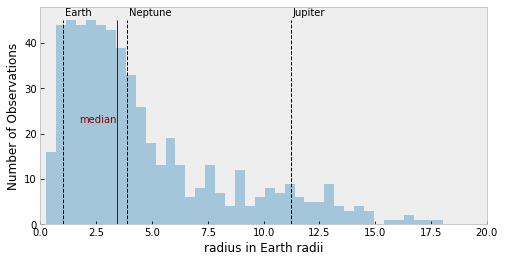

In [11]:
threshold = 20
size_count_th = ep[(ep['koi_prad'] <= threshold) & \
                   (ep['koi_disposition'] == 'CONFIRMED')] \
                   .groupby('koi_prad').size().reset_index()
size_count_th.columns = ['radius', 'count']

fix, ax = plt.subplots(figsize=(8,4))
sns.distplot(size_count_th['radius'], 
             bins=2*threshold, kde=False, 
             axlabel='radius in Earth radii')
plt.vlines(1, 0, 45, ls='dashed', lw=1)
plt.vlines(3.883, 0, 45, ls='dashed', lw=1)
plt.vlines(11.209, 0, 45, ls='dashed', lw=1)
plt.vlines(size_count_th['radius'].median(), 0, 45, lw=1, color='darkred')
plt.text(1+0.1, 46, 'Earth')
plt.text(3.883+0.1, 46, 'Neptune')
plt.text(11.209+0.1, 46, 'Jupiter')
plt.text(size_count_th['radius'].median(), 22.5, 'median', ha='right', color='darkred')
plt.xlim(0, threshold)
plt.ylabel('Number of Observations')
plt.ylim(0, 48)
plt.grid();

50 % of confirmed exoplanets are smaller than Neptune. Of them roughly half are bigger than 2 Earth radii, having earned them the name 'Super-Earth' or 'mini-Neptune', depending on their size, mass and density. Unfortunately for this analysis the density can't be calculated as the planets' masses are unknown. This can only be obtained by follow-up observations using the radial velocity method from which the mass can then be calculated. While a number of exoplanets have been confirmed by using this method the results were not included in the dataset.

It might be expected that Neptune-sized planets and bigger orbit quite far out from their host star but this is actually not the distribution we see in the Kepler data. In fact all observed and confirmed planets larger than 15 and smaller than 20 Earth radii orbit very close to their stars. The same applies to any planets larger than this but these have been filtered out to make the plot less crowded.

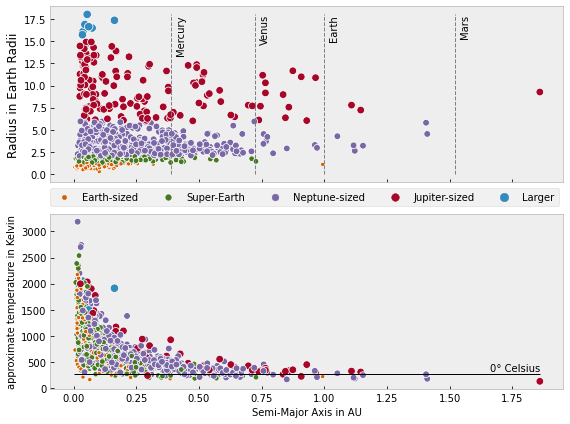

In [12]:
conf_th = ep[(ep['koi_prad'] <= threshold) & \
               (ep['koi_disposition'] == 'CONFIRMED')]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.5, 6), sharex=True)
# radius
sns.scatterplot(x='koi_sma', y='koi_prad', hue='planet_cat', size='planet_cat',
                hue_order=['Larger', 'Jupiter-sized', 'Neptune-sized', 'Super-Earth', 'Earth-sized'],
                size_order=['Larger', 'Jupiter-sized', 'Neptune-sized', 'Super-Earth', 'Earth-sized'],
                data=conf_th, ax=ax1, legend=False)
ax1.grid()
ax1.set_ylabel('Radius in Earth Radii')
for x, name in zip(sol_sys_sma[:4], sol_sys_names[0:4]):
    ax1.vlines(x, 0, conf_th['koi_prad'].max(), ls='dashed', lw=1, color='gray')
    ax1.text(x + 0.02, conf_th['koi_prad'].max(), name, rotation=90, va='top')
sns.scatterplot(x='koi_sma', y='koi_teq', hue='planet_cat', size='planet_cat',
                hue_order=['Larger', 'Jupiter-sized', 'Neptune-sized', 'Super-Earth', 'Earth-sized'],
                size_order=['Larger', 'Jupiter-sized', 'Neptune-sized', 'Super-Earth', 'Earth-sized'],
                data=conf_th, ax=ax2)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:0:-1], labels[:0:-1], ncol=5, 
           bbox_to_anchor=(-0.01, 1.175), loc='upper left')
ax2.hlines(273.15, 0, conf_th['koi_sma'].max(), lw=1, color='black')
ax2.text(conf_th['koi_sma'].max(), 325, '0° Celsius', color='black', ha='right')
ax2.grid()
ax2.set_xlabel('Semi-Major Axis in AU', fontsize=10)
ax2.set_ylabel('approximate temperature in Kelvin', fontsize=10)
fig.tight_layout();

Both very large stars and Earth-sized planets orbit much farther in than even Mercury does but interestingly this does not actually mean that all of them are also very hot. The equilibrium temperature of the Earth is 255 K and average or surface temperature is 288 K. This is a very small margin of -18° to +15°C. It is not possible to extrapolate from the equilibrium temperature to the surface temperature. For example, Venus has an equilibrium temperature of approximately 260 K, but a surface temperature of 740 K due to its run-away greenhouse effect.

Provided every confirmed exoplanet has an atmosphere but none have a run-away greenhouse effect there are only 21 planets to be found in the dataset within an equilibrium temperature range between 240 and 270 K (+- 15 degrees of Earth's equilibrium temperature).

### Multi-Planetary Systems

As seen above only a handful of planetary systems in the dataset have six or seven exoplanets where most or all have not turned out to be false positives. These planets are not spread out to many astronomical units, most don't reach even beyond Earth's orbit. The system around star 'K00082' is so compact that the plot barely shows all five planets! This is amazing since their stars are comparable to the Sun's radius und mass so given our own solar system we would expect something along the same lines.

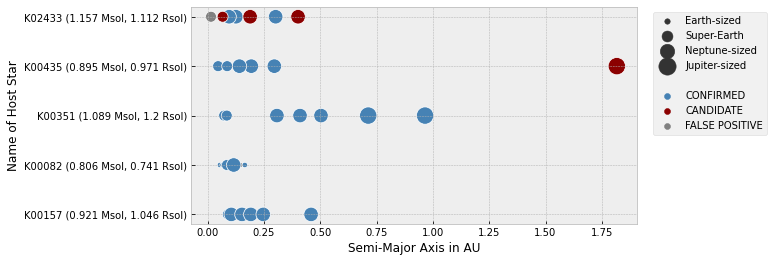

In [13]:
multi_sys = ep[ep['koi_count'] > 5].sort_values('kepid').reset_index()
multi_sys['koi_smass'] = multi_sys['koi_smass'].replace(0.916, 0.895)
multi_sys['koi_smass'] = multi_sys['koi_smass'].replace(1.090, 1.157)
multi_sys['koi_srad'] = multi_sys['koi_srad'].replace(1.153, 1.112)
multi_sys['koi_srad'] = multi_sys['koi_srad'].replace(0.832, 0.971)
multi_sys['kep_star'] = multi_sys['kepoi_name'].str[:6] + \
                        ' (' + multi_sys['koi_smass'].astype(str) + ' Msol, ' + \
                        multi_sys['koi_srad'].astype(str) + ' Rsol)'
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(x='koi_sma', y='kep_star', size='planet_cat', hue='koi_disposition',
                hue_order=['FALSE POSITIVE', 'CANDIDATE', 'CONFIRMED'],
                size_order=['Jupiter-sized', 'Neptune-sized', 'Super-Earth', 'Earth-sized'],
                sizes=(30, 300), palette=['grey', 'darkred', 'steelblue'],
                data=multi_sys, legend='brief')
handles, labels = ax.get_legend_handles_labels()
labels[4] = ' '
ax.legend(handles[:0:-1], labels[:0:-1],
           bbox_to_anchor=(1.025, 1), loc='upper left')
plt.xlabel('Semi-Major Axis in AU')
plt.ylabel('Name of Host Star');

# Data Cleaning

Around 25% of all Kepler Objects of Interest are currently marked as candidates for exoplanets. So far only three of them have been marked as 'light curve not consistent with a planet transit' or having a significant secondary event, pointing to a binary eclipse of two stars rather than a star and a planet.

While follow-up missions are definitely needed there are enough features in the dataset to try and predict how many of them are likely to be exoplanets based on the remaining 75% which were already classified.

## Reducing Number of Dataset Columns

Before any machine learning techniques can be applied, the data must be cleaned of inconsistent, inconsequential and missing values. Our analysis did not show any (obvious) inconsistent data, just outliers which are physically possible and should be kept in the data. There are quite a few columns that don't provide any value to the analysis and machine learning algorithms for different reasons. These should be dropped from the dataframe altogether before visualizing and dealing with missing data:

- entirely empty columns
- columns with exactly one unique value
- categorical data like the names of stars and confirmed exoplanets and their ids.
- descriptive data, e.g. methods used to obtain the data plus all columns that are subordinate to them (e.g. Limb Darkening Model Names and the coefficients).
- Descriptive data pertaining to the potential host star. This includes the sky coordinates and its visual magnitude at different wavelengths. These values are not actual physical properties of the stars.
- vetting statistics were not observed but added after analysis, about two thirds of them for false positives.

Doing so leaves us with 24 columns which is still a lot for any machine algorithm to work with. Nonetheless we can now visualize the amount of data we have for each of the columns.

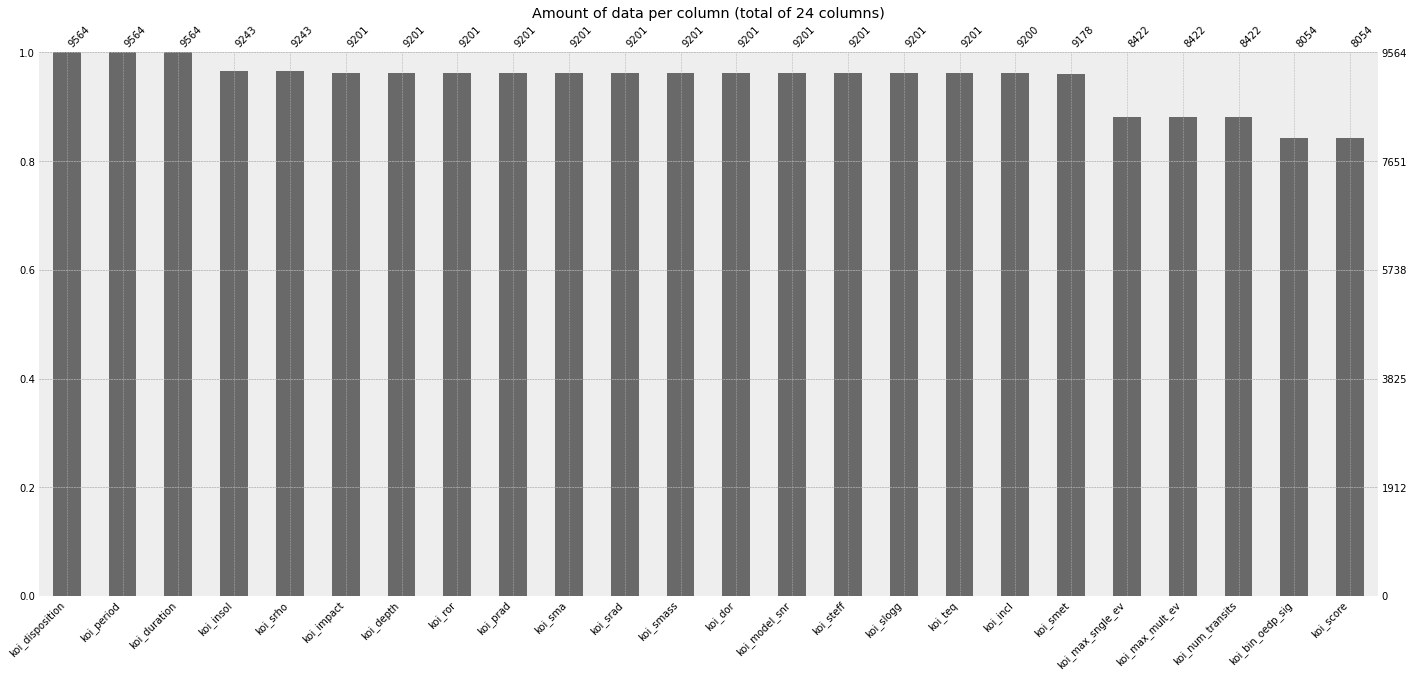

In [14]:
df_for_ml = ep.copy()

# no data at all
drop_lst = [col for col in df_for_ml.columns if df_for_ml[col].nunique() == 0]
# exactly one unique value
drop_lst += [col for col in df_for_ml.columns if df_for_ml[col].nunique() == 1]
# categorical and descriptive
drop_lst += [col for col in df_for_ml.columns if df_for_ml[col].dtype == 'O' \
             and col != 'koi_disposition']
drop_lst += ['rowid', 'kepid', 'koi_time0', 'koi_time0bk', 'koi_count']
drop_lst += [col for col in df_for_ml.columns if 'koi_tce' in col]
# star parameters
drop_lst += [col for col in df_for_ml.columns if 'mag' in col]
drop_lst += ['ra', 'dec']
# vetting statistics
drop_lst += [col for col in df_for_ml.columns if 'fwm' in col]
drop_lst += [col for col in df_for_ml.columns if 'dicco' in col]
drop_lst += [col for col in df_for_ml.columns if 'dikco' in col]
drop_lst += [col for col in df_for_ml.columns if 'fpflag' in col]
# references to models used that do not pertain even indirectly to the planets
drop_lst += [col for col in df_for_ml.columns if 'coeff' in col]

df_for_ml.drop(columns=drop_lst, inplace=True)
msno.bar(df_for_ml, sort='descending', fontsize=10, labels=True)
plt.title('Amount of data per column (total of ' + str(df_for_ml.shape[1]) + ' columns)')
plt.show()

That doesn't look bad. Almost every column has less than 10% of data missing.

## Missing Values

Two column do have more than 10% data missing:
- `koi_bin_oedp_sig` which doesn't have a description in the data model provided by NASA! Neither is Google able to find one so the definition is probably not hidden on any other website. This can be safely dropped.
- `koi_score` is "a value between 0 and 1 that indicates the confidence in the KOI disposition." and is therefore part of the vetting statistics already dropped. For some reason it's not listed together with the vetting stats.

The second-least populated columns are
- `koi_num_transits` which describes the number of expected or only partially observed transits. Originally this data referred to candidates so it seems safe to drop the columns as well.
- `koi_max_sngle_ev` and `koi_max_mult_ev` are both calculated values of maximum single/multiple events. While they may well be important for predictions it will be difficult to infer the missing values. There are 1142 rows with missing data and 8421 unique values for each of the columns which makes it difficult if not impossible to impute values. The range is also really huge and the difference between mean and median is not negligible either. To avoid confusion for the machine learning model these columns should be dropped as well.

17 of the 20 columns still left have a smaller amount of missing data. It looks as if the amount of missing data for all of them is the same. This basically confirmed by the missingness matrix (white lines are missing values) and it also shows that mostly teh same rows across columns are affected.

Overall there are now 635 rows where data is missing in at least one column. This corresponds to 6.6% of the data.

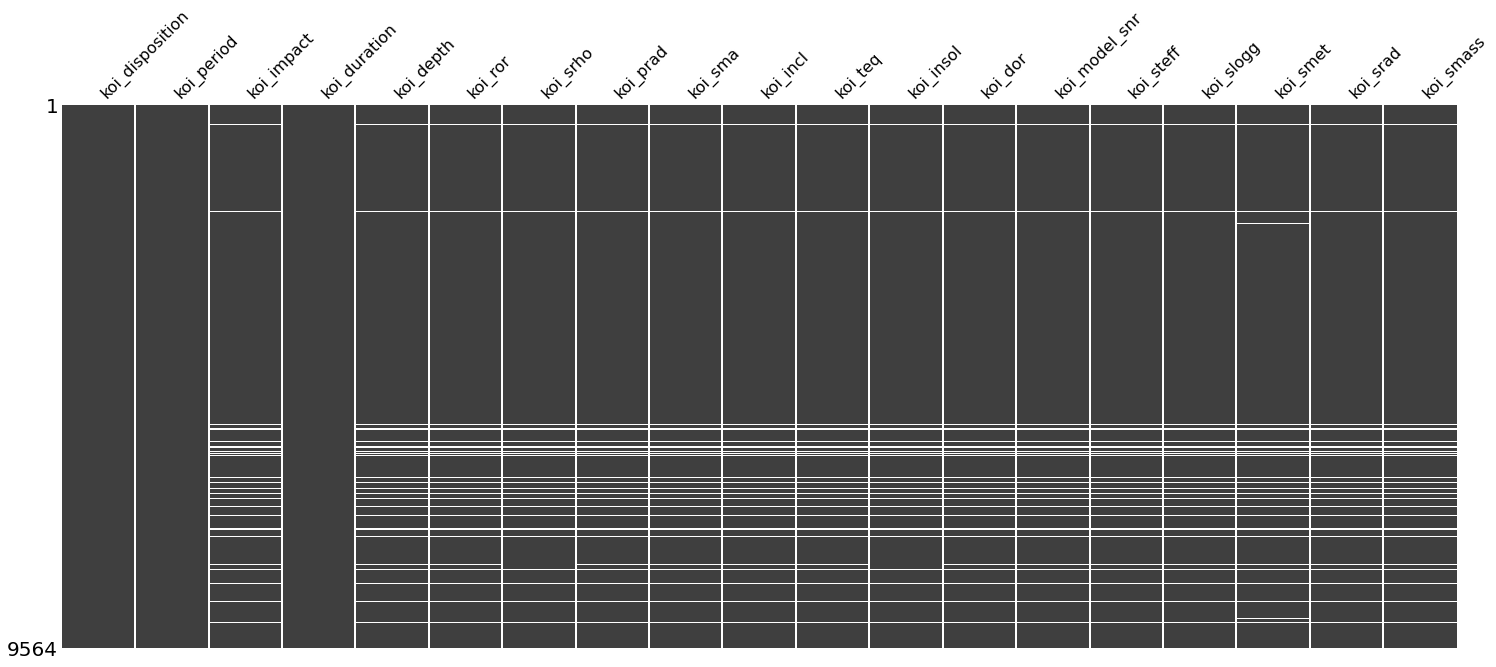

In [15]:
df_for_ml.drop(columns=['koi_bin_oedp_sig', 'koi_score', 'koi_num_transits', 
                        'koi_max_sngle_ev', 'koi_max_mult_ev'], inplace=True)
msno.matrix(df_for_ml, sparkline=False);

We will have to have a look at the candidates data to decide whether to delete just the rows with missing data or drop the columns entirely.

## Correlations in the Dataset

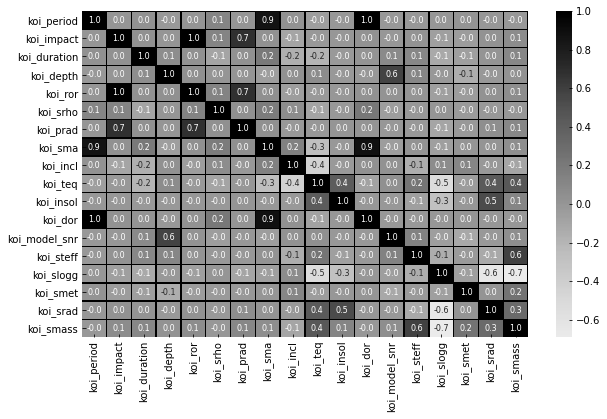

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_for_ml.corr(), ax=ax, cmap='Greys', center=0, lw=0.25, linecolor='black',
           annot=True, annot_kws={'fontsize':8}, fmt='.1f');

Unfortunately there aren't very many correlations between the columns - most don't seem to be related at all. 

High correlations are only between the planet's orbital period (koi_period), its orbit's semi-major axis (koi_sma) and the "Planet-Star Distance over Star Radius" (koi_dor). The semi-major axis depends on the orbit and the planet-star distance *is* the semi-major axis so the correlation is obvious. Of the three only the orbital period has no missing values. We already found in the analysis that all three of them have outliers and a non-linear distribution so it doesn't seem safe to impute values for the missing data.

There are a handful of moderate positive and negative correlations, most notably between Impact Parameter (koi_impact), Planet-Star Radius Ratio (koi_ror) and the exoplanet's radius (koi_prad). All three of them have the same number of missing values. All three suffer from the same outliers the orbital period does.

Other than that there is a moderate negative correlation between the star's mass (koi_smass), its radius (koi_srad), gravity (koi_slogg) and the planet's equilibrium temperature. There's also an  positive correlation to the planet's incoming radiation (koi_insol) and the effective temperature of the star (koi_steff). Again all of them have the same number of missing values and the same problem with outliers.

My conclusion is to accept the loss of 6.6% of the data rather than screwing the results by imputing values that are too complex to impute. Dropping the rows leaves us with 8929 Kepler Objects of Interest to use for machine learning.

Otherwise it looks very much as if the machine learning algorithms will have to figure out the underlying patters by themselves! I certainly can't see any trends which might help.

In [17]:
df_for_ml.dropna(inplace=True)
df_for_ml.to_csv('cumulative_cleaned_reduced.csv')

# Machine Learning

Why use machine learning at all on such a comparatively small dataset? After data cleaning there are only just above 2250 candidates left and there are thousands of astronomers around. So why not simply ask the astronomy community to make observations on one star and its candidates each? Well, the most important reason is that you can't use any small telescope equipped with the right instruments because of Earth's atmospheric turbulence, also called "seeing". This turbulence is what makes stars shimmer or twinkle as we look up at them, making any tiny change either in radial velocity or luminosity very hard to detect. There are a number of high-end telescopes now that use adaptive optics to account for this. Telescopes in space, be it in orbit around Earth or sitting in a Lagrange point, don't have this problem because there's very little or no atmosphere hindering their view. However, there are also fewer of them. Observation time on both is highly sought after and there is fierce competition. The application process is quite complicated, takes a long time and even then it's more likely to have your application declined then accepted. Looking at exoplanet candidates more or less haphazardly is not going to make even the first round of applications!

Machine learning can help astronomers to determine the most interesting candidates by finding patterns in the data a human would be hard put to find. Humans are exceptionally good at finding visual patterns even when there are in fact none but we are dealing with rows and rows of dry numbers here which would be rather difficult to visualize in any meaningful way. A computer, on the other hand, is ideally suited to finding patterns in numbers. Using different techniques the number of promising candidates can be whittled down to a more manageable number. These could then be cross-referenced with catalogues from other missions, like TESS for exoplanets or GAIA for stars.

The feature we want to predict is a categorical value consisting of two possible categories: 'CONFIRMED' and 'FALSE POSITIVE' which could also be described as a Boolean value of True for confirmed exoplanets and false for false alarms.

Since the Kepler data is labelled accordingly for 75% of the data I only use supervised learning techniques here. There are several machine learning algorithms that support categorical or discrete values as the target feature. Due to limited resources of computational power I have chosen four of them:

- logistic regression
- k nearest neighbour
- decision tree
- random forest

All have medium to high accuracy and, except of random forests, transparency. All of these will be compared and evaluated using the metrics provided by the scikit learn library.

First it is necessary to split the dataset into features and training and test data. The latter comprises all rows in the dataset that are not marked as 'CANDIDATES'.

The feature to predict is in the column 'koi_disposition'. All others features will be used for prediction.

In [18]:
df_conf_fp = df_for_ml[df_for_ml['koi_disposition'] != 'CANDIDATE'].copy()
df_candi = df_for_ml[df_for_ml['koi_disposition'] == 'CANDIDATE'].copy()

print('The labelled data contains', df_conf_fp.shape[0], 'rows.')
print('The unknown data for which prediction will be made later contains', df_candi.shape[0], 'rows.')

y = df_conf_fp['koi_disposition']
X = df_conf_fp.drop(columns = 'koi_disposition')

The labelled data contains 6919 rows.
The unknown data for which prediction will be made later contains 2258 rows.


The next step is to split the labelled data into training and test sets.

The training set is used, as the name suggests, to train the model and should be the same for each of the four methods. 

The test set will be use to evaluate the accuracy and other metrics of the algorithms' results.

There is no hard and fast rule how the labelled data should be split into the two sets. With having quite a lot of data we can afford to use 80% for training and 20% for testing. It is imported to keep the ratio of confirmed and false positives to avoid introducing a bias towards false positives as there are twice as many as confirmed exoplanets. I'm also using a seed here to keep the results the same for every run. Otherwise the split would occur differently every time the code is run.

I'm not using techniques like k-fold or cross-validation here, partly because of limited resources, partly because I'm not really proficient in them.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=10)

print('training data:', y_train.value_counts(), '',
      'testing data:', y_test.value_counts(), sep='\n')

training data:
FALSE POSITIVE    3649
CONFIRMED         1886
Name: koi_disposition, dtype: int64

testing data:
FALSE POSITIVE    913
CONFIRMED         471
Name: koi_disposition, dtype: int64


## Models in Action

### Logistic Regression

Logistic regression is typically used for machine learning problems where the outcome is binary, i.e. one of two classes: True/False, Yes/No or - as in this case - confirmed or false positive. The correlation between the outcome and the input variables can't be linear, otherwise linear regression should be used. As seen in chapter Distances from the Star this is not a linear relationship although they depend on each other. We would find that the same is true for other of the independent variables.

The algorithm estimates the probability of either outcome event occurring based on a combination of independent variables and predicts the one with the higher likelihood. If we could plot an n-dimensional depiction of all data points we would see a sinuous plane dividing all data points into our two categories.

This is the result when using logistic regression on our problem:

In [20]:
from sklearn.metrics import precision_recall_fscore_support as score
all_scores = []
scores = ['precision', 'recall', 'fscore', 'support']
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=100)
lrmodel.fit(X_train, y_train)
lrmodel_known_predict = lrmodel.predict(X_test)

for metric, mscore in zip(scores, score(y_test, lrmodel_known_predict)):
    all_scores.append(['1. Logistic Regression', metric] + list(mscore.round(2)))

lrconfusion_list = confusion_matrix(y_test, lrmodel_known_predict).ravel()
print('Accuracy Score:', '='*15, accuracy_score(y_test, lrmodel_known_predict), '', sep='\n')
print('PREDICTIONS COUNT', '='*17, 
      'overall predictions for CONFIRMED: ' + str(lrconfusion_list[0] + lrconfusion_list[2]),
      'overall predictions for FALSE POSITIVE: ' + str(lrconfusion_list[1] + lrconfusion_list[3]),
      '', sep='\n')
print('Confusion Matrix (actual-predicted):', '='*36, 
      'CONFIRMED - CONFIRMED ' + str(lrconfusion_list[0]),
      'CONFIRMED - FALSE POSITIVE ' + str(lrconfusion_list[1]),
      'FALSE POSITIVE - CONFIRMED ' + str(lrconfusion_list[2]),
      'FALSE POSITIVE - FALSE POSITIVE ' + str(lrconfusion_list[3]), sep='\n')

X_pred = df_candi.drop(columns = 'koi_disposition')

lrmodel_unknown_predict = lrmodel.predict(X_pred)

Accuracy Score:
0.838150289017341

PREDICTIONS COUNT
overall predictions for CONFIRMED: 631
overall predictions for FALSE POSITIVE: 753

Confusion Matrix (actual-predicted):
CONFIRMED - CONFIRMED 439
CONFIRMED - FALSE POSITIVE 32
FALSE POSITIVE - CONFIRMED 192
FALSE POSITIVE - FALSE POSITIVE 721


This model has an accuracy score of 0.84, meaning that 84% of the test set classifications were predicted correctly.

The (prettified) confusion matrix shows that almost 200 candidates have been predicted to be confirmed exoplanets when they should have been classified as false positives.

Tweaking the solver or allowing the algorithm more iterations didn't change the results.

### K Nearest Neighbour

When using K nearest neighbour the algorithm does it best to place similar data points near to each other. The outcome is the category most of the data points in the vicinity belong to. This can be used for n-nominal problems, i.e. problems with more than two outcome possibilities, because there can be any number of groups of data points in different categories as long as these don't overlap.

This algorithm works by being lazy. Instead of learning from the training data set immediately it only takes action when presented with the test set! Then it searches for similarities between one data point in the test set and all data points in the training set, clusters those and decides which ones the test data lies closes to. Then it takes the next data point and does the same until it reaches the end. Since it doesn't really learn from the training data it is likely to be less accurate when the data is diverse or small.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knnresult = []

for num in range(1, 21):
    knnmodel = KNeighborsClassifier(n_neighbors=num)
    knnmodel.fit(X_train, y_train)
    knnmodel_predict = knnmodel.predict(X_test)
    knnresult.append(round(accuracy_score(y_test, knnmodel_predict),2))

knnmodel = KNeighborsClassifier(n_neighbors=knnresult.index(max(knnresult)) + 1)
knnmodel.fit(X_train, y_train)
knnmodel_known_predict = knnmodel.predict(X_test)

for metric, mscore in zip(scores, score(y_test, knnmodel_predict)):
    all_scores.append(['2. K Nearest Neighbour', metric] + list(mscore.round(2)))

knnconfusion_list = confusion_matrix(y_test, knnmodel_known_predict).ravel()
print('Accuracy Score:', '='*15, accuracy_score(y_test, knnmodel_known_predict), '', sep='\n')
print('PREDICTIONS COUNT', '='*17, 
      'overall predictions for CONFIRMED: ' + str(knnconfusion_list[0] + knnconfusion_list[2]),
      'overall predictions for FALSE POSITIVE: ' + str(knnconfusion_list[1] + knnconfusion_list[3]),
      '', sep='\n')
print('Confusion Matrix (actual-predicted):', '='*36, 
      'CONFIRMED - CONFIRMED ' + str(knnconfusion_list[0]),
      'CONFIRMED - FALSE POSITIVE ' + str(knnconfusion_list[1]),
      'FALSE POSITIVE - CONFIRMED ' + str(knnconfusion_list[2]),
      'FALSE POSITIVE - FALSE POSITIVE ' + str(knnconfusion_list[3]), sep='\n')
print('','n_neighbours: ' + str(knnresult.index(max(knnresult)) * 5), sep='\n')

X_pred = df_candi.drop(columns = 'koi_disposition')

knnmodel_unknown_predict = knnmodel.predict(X_pred)

Accuracy Score:
0.8179190751445087

PREDICTIONS COUNT
overall predictions for CONFIRMED: 551
overall predictions for FALSE POSITIVE: 833

Confusion Matrix (actual-predicted):
CONFIRMED - CONFIRMED 385
CONFIRMED - FALSE POSITIVE 86
FALSE POSITIVE - CONFIRMED 166
FALSE POSITIVE - FALSE POSITIVE 747

n_neighbours: 65


This model has an even lower accuracy score of only 82% correct predictions.

Again a high ratio of candidates were predicted to be confirmed exoplanets that are, in fact, false positives. There are also almost three times the number of confirmed exoplanets that were predicted to be false positives compared to logistic regression.

For this algorithm the best number for neighbours was chosen by iterating through all values between 1 and 20 and determining which had the best accuracy score.

### Decision Tree
A decision tree is basically a family tree put upside down. It starts from a root node and splits the training data into two sets according to rules it derives on its own. Each set is then split into two again unless the outcome is already uniform for all data points in one set. This is repeated until the results don't change by further splitting. You can see the schematics of the decision tree used here in the appendix.

The outcome variable for decision trees can be n-nominal as long as there are no ambiguities. Every data point has to belong to one category, and one only. Every independent input variable can be used once or several times, or not at all. This is determined by the algorithm and can't be controlled through input parameters. It is possible to keep the leaf nodes, i.e. the nodes which have a unique outcome, down to a small number to keep the algorithm from going overboard. However, it is mostly better to let the algorithm determine the number for itself to get the best possible accuracy.

In [22]:
from sklearn.tree import DecisionTreeClassifier

dcresult = []
for num in range(5, 100, 5):
    dcmodel = DecisionTreeClassifier(max_leaf_nodes=num)
    dcmodel.fit(X_train, y_train)
    dcmodel_predict = dcmodel.predict(X_test)
    dcresult.append(round(accuracy_score(y_test, dcmodel_predict),3))

dcmodel = DecisionTreeClassifier(max_leaf_nodes=dcresult.index(max(dcresult)) * 5)
dcmodel.fit(X_train, y_train)
dcmodel_known_predict = dcmodel.predict(X_test)

for metric, mscore in zip(scores, score(y_test, dcmodel_known_predict)):
    all_scores.append(['3. Decision Tree', metric] + list(mscore.round(2)))

dcconfusion_list = confusion_matrix(y_test, dcmodel_known_predict).ravel()
print('Accuracy Score:', '='*15, accuracy_score(y_test, dcmodel_known_predict), '', sep='\n')
print('PREDICTIONS COUNT', '='*17, 
      'overall predictions for CONFIRMED: ' + str(dcconfusion_list[0] + dcconfusion_list[2]),
      'overall predictions for FALSE POSITIVE: ' + str(dcconfusion_list[1] + dcconfusion_list[3]),
      '', sep='\n')
print('Confusion Matrix (actual-predicted):', '='*36, 
      'CONFIRMED - CONFIRMED ' + str(dcconfusion_list[0]),
      'CONFIRMED - FALSE POSITIVE ' + str(dcconfusion_list[1]),
      'FALSE POSITIVE - CONFIRMED ' + str(dcconfusion_list[2]),
      'FALSE POSITIVE - FALSE POSITIVE ' + str(dcconfusion_list[3]), sep='\n')
print('','max leaf nodes: ' + str(dcresult.index(max(dcresult)) * 5), sep='\n')

X_pred = df_candi.drop(columns = 'koi_disposition')

dcmodel_unknown_predict = dcmodel.predict(X_pred)

Accuracy Score:
0.9132947976878613

PREDICTIONS COUNT
overall predictions for CONFIRMED: 471
overall predictions for FALSE POSITIVE: 913

Confusion Matrix (actual-predicted):
CONFIRMED - CONFIRMED 411
CONFIRMED - FALSE POSITIVE 60
FALSE POSITIVE - CONFIRMED 60
FALSE POSITIVE - FALSE POSITIVE 853

max leaf nodes: 75


The decision tree has been able to predict 92% of the labels correctly. 

Here, the ration between overall predictions for both labels is basically the same as in the test set (1/3 CONFIRMED, 2/3 FALSE POSITIVE). This has not been the case with the other two algorithms, especially logistic regression which tended towards 50-50.

The amount of false predictions for both labels is almost the same, just below 60.

It doesn't seem possible that choosing even more leaf nodes for the tree would tweak the results to an even better outcome. As with the previous model the best number was reached by iterating through a range of values, this time ranging from just 5 to 100.

### Random Forest

Decision trees have the disadvantage that they tend to overfit the data and then perform poorly on any data not seen before, in our case the candidates. To avoid this it is recommended to use a random forest which takes many decision trees and compares them to get the best possible accuracy.

It uses random subsets of the training data for this. The randomness of the subsets ensures that each data point will be used at least twice. Once all decision trees have been build the algorithm takes the majority vote on each data point across all trees and uses this as its prediction. Random Forests work best if they are allowed to build many decision trees. In Python the default value is 10 but it is better to use another algorithm to find the best number. In our case the number chosen was 85.

The main disadvantage of random forests is that it takes a much longer time and might not get significantly better results than a single decision tree that already had good accuracy not only with the test data but also with data it hasn't seen before which is actually the case here.

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfresult = []
for num in range(5, 200, 5):
    rfmodel = RandomForestClassifier(n_estimators=num)
    rfmodel.fit(X_train, y_train)
    rfmodel_predict = rfmodel.predict(X_test)
    rfresult.append(round(accuracy_score(y_test, rfmodel_predict),3))

rfmodel = RandomForestClassifier(n_estimators=rfresult.index(max(rfresult)) * 5)
rfmodel.fit(X_train, y_train)
rfmodel_known_predict = rfmodel.predict(X_test)

for metric, mscore in zip(scores, score(y_test, rfmodel_known_predict)):
    all_scores.append(['4. Random Forest', metric] + list(mscore.round(2)))

rfconfusion_list = confusion_matrix(y_test, rfmodel_known_predict).ravel()
print('Accuracy Score:', '='*15, accuracy_score(y_test, rfmodel_known_predict), '', sep='\n')
print('PREDICTIONS COUNT', '='*17, 
      'overall predictions for CONFIRMED: ' + str(rfconfusion_list[0] + rfconfusion_list[2]),
      'overall predictions for FALSE POSITIVE: ' + str(rfconfusion_list[1] + rfconfusion_list[3]),
      '', sep='\n')
print('Confusion Matrix (actual-predicted):', '='*36, 
      'CONFIRMED - CONFIRMED ' + str(rfconfusion_list[0]),
      'CONFIRMED - FALSE POSITIVE ' + str(rfconfusion_list[1]),
      'FALSE POSITIVE - CONFIRMED ' + str(rfconfusion_list[2]),
      'FALSE POSITIVE - FALSE POSITIVE ' + str(rfconfusion_list[3]), sep='\n')
print('','n_estimator: ' + str(rfresult.index(max(rfresult)) * 5), sep='\n')

X_pred = df_candi.drop(columns = 'koi_disposition')

rfmodel_unknown_predict = rfmodel.predict(X_pred)

Accuracy Score:
0.9371387283236994

PREDICTIONS COUNT
overall predictions for CONFIRMED: 470
overall predictions for FALSE POSITIVE: 914

Confusion Matrix (actual-predicted):
CONFIRMED - CONFIRMED 427
CONFIRMED - FALSE POSITIVE 44
FALSE POSITIVE - CONFIRMED 43
FALSE POSITIVE - FALSE POSITIVE 870

n_estimator: 100


This model has the best accuracy score yet at 93% correct predictions. This came at a price though. Including finding the best number for the total number of decision trees of the random forest it took over a minute to run compared to just 1.5 seconds for using just one decision tree with the best amount of leaf nodes.

The amount of false predictions for both labels is almost identical again and only a little lower than for just the one decision tree.

For finding the best number of total trees the iteration used values between 5 and 200.

## Comparison and Evaluation

### Visual Comparison of Predictions of Known Outcomes

Above we were looking at the accuracy score of each model and the number of overall false predictions for each model in turn. This made direct comparison somewhat difficult.

To get a feel for the models it's much easier looking at a visual representation of how many of the predictions on the test set were actually true and how many were not.

The following confusion matrix uses ratios in each row rather than actual values. This ensures that the scale is the same for every matrix and makes comparisons much easier.

Although the accuracy score for logistic regression was rather low at 84% the predictions for confirmed exoplanets were better than for every other model used. Only 7% were predicted as false positives while the others are much higher at 9.6 to 18%. 

On the other hand random forest was able to make the best predictions regarding false positives with less than 5% predicted as confirmed while both logistic regression and k nearest neighbour have an error rate of around 20%.

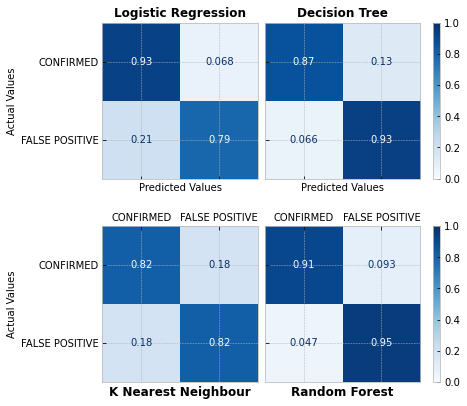

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,6))

# Logistic Regression
lrdisp = plot_confusion_matrix(lrmodel, X_test, y_test, ax=ax1, 
                      normalize='true', cmap=plt.cm.Blues)
lrdisp.im_.set_clim(0, 1)
lrdisp.im_.colorbar.remove()
ax1.set_title('Logistic Regression', fontsize=12, weight='bold')
ax1.set_xlabel('Predicted Values', fontsize=10)
ax1.set_ylabel('Actual Values', fontsize=10)

# K Nearest Neighbor
knndisp = plot_confusion_matrix(knnmodel, X_test, y_test, ax=ax3, 
                      normalize='true', cmap=plt.cm.Blues)
knndisp.im_.set_clim(0, 1)
knndisp.im_.colorbar.remove()
ax3.xaxis.tick_top()
ax3.set_title('')
ax3.set_xlabel('K Nearest Neighbour', fontsize=12, weight='bold')
ax3.set_ylabel('Actual Values', fontsize=10)

# Decision Tree
dcdisp = plot_confusion_matrix(dcmodel, X_test, y_test, ax=ax2, 
                      normalize='true', cmap=plt.cm.Blues)
dcdisp.im_.set_clim(0, 1)
ax2.set_title('Decision Tree', fontsize=12, weight='bold')
ax2.set_xlabel('Predicted Values', fontsize=10)
ax2.set_ylabel('')

# Random Forest
rfdisp = plot_confusion_matrix(rfmodel, X_test, y_test, ax=ax4, 
                      normalize='true', cmap=plt.cm.Blues)
rfdisp.im_.set_clim(0, 1)
ax4.xaxis.tick_top()
ax4.set_title('')
ax4.set_xlabel('Random Forest', fontsize=12, weight='bold')
ax4.set_ylabel('')

fig.tight_layout(pad=2)

### Model Scores

For anyone interested this is a comprehensive overview of the detailed scores of each model:

In [25]:
df_scores = pd.DataFrame.from_records(all_scores, columns=['Model', 'Score', 'CONFIRMED', 'FALSE POSITIVE'])
custom_dict = {'Logistic Regression': 0, 'K Nearest Neighbour': 1, 'Decision Tree': 2,
              'Random Forest': 3} 
df_scores.sort_values(['Score', 'Model'], inplace=True)
df_scores.set_index(['Score', 'Model'])

CONFIRMED  FALSE POSITIVE
Score     Model                                            
fscore    1. Logistic Regression       0.80            0.87
          2. K Nearest Neighbour       0.74            0.85
          3. Decision Tree             0.87            0.93
          4. Random Forest             0.91            0.95
precision 1. Logistic Regression       0.70            0.96
          2. K Nearest Neighbour       0.69            0.89
          3. Decision Tree             0.87            0.93
          4. Random Forest             0.91            0.95
recall    1. Logistic Regression       0.93            0.79
          2. K Nearest Neighbour       0.81            0.81
          3. Decision Tree             0.87            0.93
          4. Random Forest             0.91            0.95
support   1. Logistic Regression     471.00          913.00
          2. K Nearest Neighbour     471.00          913.00
          3. Decision Tree           471.00          913.00
          4. Random Forest           471.00          913.00

## Model Predictions

### Predicting Confirmed and False Positives

All four models have been used to make predictions about our data with unknown labels, aka candidates.

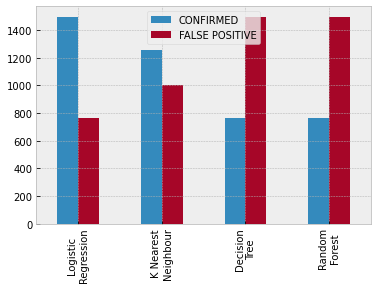

In [26]:
X_pred['lr_predictions'] = lrmodel_unknown_predict
X_pred['knn_predictions'] = knnmodel_unknown_predict
X_pred['dc_predictions'] = dcmodel_unknown_predict
X_pred['rf_predictions'] = rfmodel_unknown_predict
X_final = pd.DataFrame({'lr': X_pred['lr_predictions'],
                        'knn': X_pred['knn_predictions'],
                        'dc': X_pred['dc_predictions'],
                        'rf': X_pred['dc_predictions']})
val_counts = []
for col in X_final.columns:
    val_counts.append([col] + X_final[col].value_counts().sort_index().to_list())
df_val_counts = pd.DataFrame.from_records(val_counts, columns=['model', 'CONFIRMED', 'FALSE POSITIVE'])
df_val_counts.plot.bar(x='model')
plt.legend(loc='upper center')
plt.xlabel('')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Logistic\nRegression', 'K Nearest\nNeighbour',
                                       'Decision\nTree', 'Random\nForest']);

In [27]:
print(len(X_pred))
X_pred['LOG-RF'] = X_pred['dc_predictions'] == X_pred['rf_predictions']
X_pred[X_pred['LOG-RF']==False]['dc_predictions'].value_counts()

2258


FALSE POSITIVE    141
CONFIRMED         129
Name: dc_predictions, dtype: int64

These results are rather surprising. Both logistic regression and k nearest neighbours predict the opposite ratio of the decision tree and random forest! The latter ratio corresponds to the labelled data: There are around 1/3 of confirmed exoplanets and 2/3 of false positives. 

Considering that logistic regression performed best on confirmed exoplanets in the test data and random forest best on false positives this is quite contradictory. They must disagree on around 1/3 of the predictions. Checking counts they can't agree on approx. 750 confirmed and 60 false positive predictions of logistic regression.

Referring to the model scores above logistic regression has a much lower precision than recall score. While it has managed to predict most confirmed exoplanets as confirmed it also predicted 21% of false positives as confirmed. K nearest neighbor wasn't performing any better here although the spread wasn't quite as wide. Its precision score was even very slightly lower and the ratio of correctly predicted confirmed exoplanets was also lower. We can take it that neither is a good algorithm to use here!

Which leaves us with the simpler decision tree and the much more complex and time-intensive random forest. Both perform almost equally well and they also agree on most predictions. Out of 2258 records in the unlabelled data, they couldn't agree on 122 predictions for confirmed exoplanets and 141 false positives (predictions by decision tree).

### Cutting Down on "Confirmed" Predictions

Since the goal of machine learning here is to give astronomers an idea which of the candidates to look at next I'm not going to prefer one model over another. All models performed at least reasonably well on predicting confirmed exoplanets in the test data so I'll look next at how often each of the candidates was predicted to be an exoplanet:

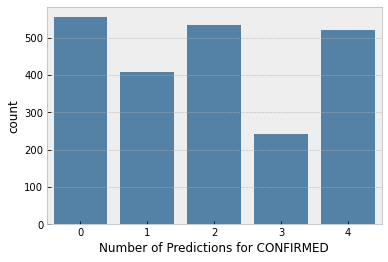

In [28]:
for col in ['lr_predictions', 'knn_predictions', 'dc_predictions', 'rf_predictions']:
    X_pred.replace({col: {'CONFIRMED': 1, 'FALSE POSITIVE': 0}}, inplace=True)
X_pred['final score'] = X_pred['lr_predictions'] + X_pred['knn_predictions'] + \
                        X_pred['dc_predictions'] + X_pred['rf_predictions']
sns.countplot(x='final score', data=X_pred, color='steelblue')
plt.xlabel('Number of Predictions for CONFIRMED');

This leaves us with just over 500 candidates to get a second look at, ideally using a different method if detection. Let's have a quick look at the distribution of these candidates regarding their size and orbits.

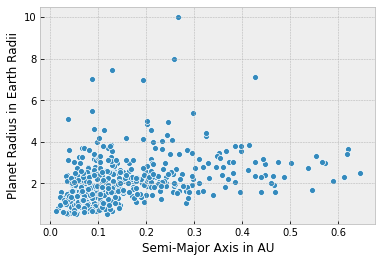

In [29]:
X_pred['planet_cat'] = X_pred.apply(size_to_cat, axis=1)

sns.scatterplot(x='koi_sma', y='koi_prad',
                data=X_pred[X_pred['final score'] == 4])
plt.xlabel('Semi-Major Axis in AU')
plt.ylabel('Planet Radius in Earth Radii');
#plt.legend(bbox_to_anchor=(1.025, 1), loc='upper left');

All of them orbit very near their star. Unless the star is a red dwarf this makes it unlikely that any of them are habitable so it might be hard to get telescope time for follow-up observations. Before even thinking about applying for it the host stars should be cross-referenced to observations taken with different instruments. This is beyond the scope of this work though.

# Appendix

## Description of Columns of Interest

A complete overview of all columns in the dataset as well as more in depth explanations can be found here: https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

|Column name|Description|
|:----------|:-------------|
|koi_disposition|The category of this KOI from the Exoplanet Archive. Current values are CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED.|
|koi_period|The interval between consecutive planetary transits.|
|koi_impact|The sky-projected distance between the centre of the stellar disc and the centre of the planet disc at conjunction, normalized by the stellar radius. Corresponds to the semi-stellar axis.|
|koi_duration|The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact.|
|koi_depth|The fraction of stellar flux lost at the minimum of the planetary transit.|
|koi_ror|The planet radius divided by the stellar radius.|
|koi_srho|Fitted stellar density is a direct observable from the light curve that, in the small-planet approximation, depends only on the transit's period, depth, and duration|
|koi_prad|The radius of the planet.|
|koi_sma|Half of the long axis of the ellipse defining a planet's orbit. For a circular orbit this is the planet-star separation radius.|
|koi_incl|Orbital Inclination in degrees.|
|koi_teq|Approximation for the temperature of the planet.|
|koi_insol|Insolation flux is another way to give the equilibrium temperature.|
|koi_dor|The distance between the planet and the star at mid-transit divided by the stellar radius.|
|koi_model_snr|Transit depth normalized by the mean uncertainty in the flux during the transits.|
|koi_steff|The photospheric temperature of the star.|
|koi_slogg|Stellar Surface Gravity on a logarithmic scale|
|koi_smet|Stellar Metallicity|
|koi_srad|The photospheric radius of the star.|
|koi_smass|The mass of the star.|

## Astronomy Weblinks

I could not have performed the analysis and written this paper if there weren't so many sources out there to get some more in-depth information and verify that my own domain knowledge is accurate. Here are some of them for you if you'd like to dive deeper into the topic:

Gravity Assist: Exoplanet Hunting with Jon Jenkins<br>
https://www.nasa.gov/mediacast/gravity-assist-exoplanet-hunting-with-jon-jenkins

Launch Pad Astronomy
- Lightning Talk: Discovering Extrasolar Planets with Kepler<br>
https://youtu.be/Q06iPD2dpXg (7 min)
- Kepler Space Telescope End of Mission<br>https://youtu.be/72u03O8p2gY (approx. 8 min).<br>Please be aware that the animations of exoplanets are artist's impressions.

All@Home: Exoplaneten by Stiftung Planetarium Berlin<br>
https://youtu.be/e27wumRt6G4 (30 min)

The Cool Worlds Lab<br>
http://coolworlds.astro.columbia.edu/<br>
video on cross-referencing: https://youtu.be/RuyLMDaodlo (19 min)

Bad Astronomy Blog, written by Phil Plait<br>
https://www.syfy.com/tags/bad-astronomy

Crash Course Astronomy with Phil Plait<br>
https://thecrashcourse.com/courses/astronomy

eBook: Astronomy by OpenStax<br>
https://openstax.org/details/books/astronomy <br>
This eBook is free of charge and has over 1,000 pages in pdf-format.<br>
It is also available for kindle and on iTunes.

## Decision Tree Chart

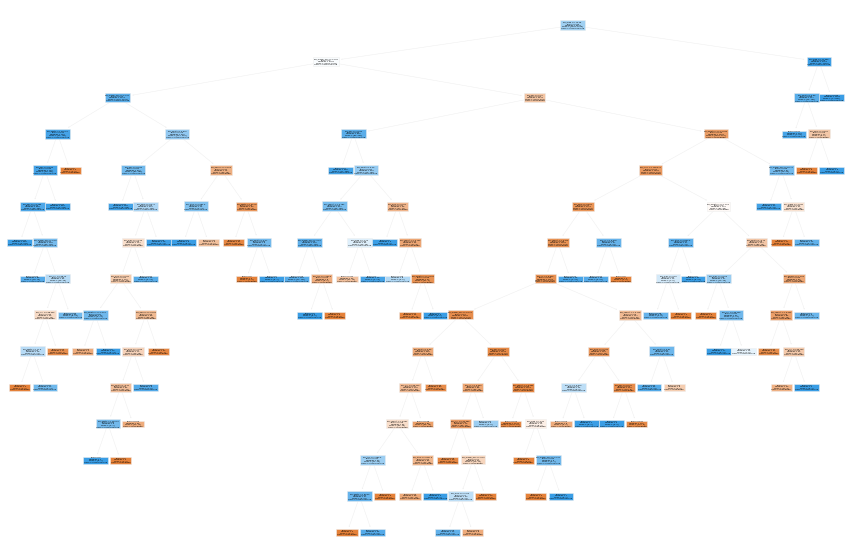

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree

X_pred = df_candi.drop(columns = 'koi_disposition')
featurenames = X_pred.columns.to_list()
model = DecisionTreeClassifier(max_leaf_nodes=dcresult.index(max(dcresult)) * 5)
model.fit(X_train, y_train)

fig = plt.figure(figsize=(15,10))
tree.plot_tree(model, feature_names=featurenames, class_names=model.classes_, filled=True)
#plt.savefig('decision_tree.png')
plt.show()